In [1]:
import os
import re
import zipfile

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
import ast
import json
from glob import glob
import cv2
import time

- video 75
- annotation csv 75

In [3]:
#forder_pedestrian = '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/'
forder_pedestrian = '/home/mvlab/Downloads/dataset/P-DESTRE/'
forder_pedestrian_annotation = forder_pedestrian + 'annotation/'
forder_pedestrian_video = forder_pedestrian + 'videos/'
forder_pedestrian_images = forder_pedestrian + 'images/'
img_w = 128
img_h = 256
class_k = 261
path_weight = 'cnn_0.ckpt'

In [4]:
os.path.isdir(forder_pedestrian),os.path.isdir(forder_pedestrian_annotation),os.path.isdir(forder_pedestrian_video)

(True, True, True)

In [5]:
list_annotation_path = glob(forder_pedestrian_annotation + '*.txt')
list_video_path = glob(forder_pedestrian_video + '*.MP4')

In [6]:
list_annotation_path.sort()
list_video_path.sort()

In [7]:
len(list_annotation_path), len(list_video_path)

(75, 75)

In [8]:
columns = ['frame', 'ID', 'x', 'y', 'w', 'h', 'head', 'yaw', 'pitch', 'roll',          
          'gender', 'age', 'height', 'body volume', 'ethnicity', 'hair color', 'hairstyle', 'beard', 'mustache', 'glasses', 
           'head accessories', 'upper cloth', 'lower cloth', 'feet', 'accessories', 'action']
len(columns)

26

In [9]:
column_feature_index = 6

In [10]:
INDEX_ID = 0
INDEX_GENDER = 5
INDEX_AGE = 6
INDEX_HEIGHT = 7
INDEX_BODY_VOLUME = 8
INDEX_ETHNICITY = 9
INDEX_HAIR_COLOR = 10
INDEX_HAIRSTYLE = 11
INDEX_BEARD = 12
INDEX_MUSTACHE = 13
INDEX_GLASSES = 14
INDEX_HEAD_ACCESSORIES = 15
INDEX_UPPER_CLOTH = 16
INDEX_LOWER_CLOTH = 17
INDEX_FEET = 18
INDEX_ACCESSORIES = 19
INDEX_ACTION = 20

In [11]:
Unknown_AGE = 8
Unknown_HEIGHT = 4
Unknown_ETHNICITY = 4
Unknown_HAIR_COLOR = 6
Unknown_HAIRSTYLE = 5
Unknown_BERD = 2
Unknown_MOUSTACHE = 2
Unknown_GLASSES = 3
Unknown_HAED_ACCESSORIES = 4
Unknown_LOWER_CLOTH = 9
Unknown_FEET = 6
Unknown_ACCESSORIES = 7

In [12]:
columns[column_feature_index:]

['head',
 'yaw',
 'pitch',
 'roll',
 'gender',
 'age',
 'height',
 'body volume',
 'ethnicity',
 'hair color',
 'hairstyle',
 'beard',
 'mustache',
 'glasses',
 'head accessories',
 'upper cloth',
 'lower cloth',
 'feet',
 'accessories',
 'action']

In [18]:
forder_pedestrian_video

'/home/mvlab/Downloads/dataset/P-DESTRE/videos/'

In [20]:
glob(forder_pedestrian_video + '*/*.jpg')

['/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00450.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00750.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00000.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00900.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00150.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00300.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/12-11-2019-3-2.MP412-11-2019-3-2/00600.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/13-11-2019-5-1.MP413-11-2019-5-1/01050.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/13-11-2019-5-1.MP413-11-2019-5-1/01500.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/13-11-2019-5-1.MP413-11-2019-5-1/00450.jpg',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/13-11-2019-5-1.MP413-1

In [16]:
i = 0
anntation_path = list_annotation_path[i]
video_path = list_video_path[i]
df = pd.read_csv(anntation_path, header=None, names=columns)
anntation_path, video_path, df.shape

('/home/mvlab/Downloads/dataset/P-DESTRE/annotation/08-11-2019-1-1.txt',
 '/home/mvlab/Downloads/dataset/P-DESTRE/videos/08-11-2019-1-1.MP4',
 (12564, 26))

In [34]:
def get_dataframe(list_annotation_path):
    list_df = []
    for i in range(len(list_annotation_path)):
        path_anno = list_annotation_path[i]
        anno_file_name = path_anno.split(os.sep)[-1]
        anno_file_name = anno_file_name[:-4]
        df = pd.read_csv(path_anno, header=None, names=columns)
        df['video'] = anno_file_name
        list_df.append(df)
        #print(i, anno_file_name, df.shape)
    
    df_all = pd.concat(list_df, axis=0)
    df_all = df_all.reset_index()
    return df_all 

df_all = get_dataframe(list_annotation_path)    
df_all.shape

(1477385, 28)

In [35]:
df_all.head()

,index,frame,ID,x,y,w,h,head,yaw,pitch,...,beard,mustache,glasses,head accessories,upper cloth,lower cloth,feet,accessories,action,video
0,0,3,-1,2071.6,975.06,96.16,221.94,-1,-1.000,-1.000,...,1,0,0,3,8,2,0,6,0,08-11-2019-1-1
1,1,3,205,1806.0,956.88,81.97,250.24,1,2.295,-32.574,...,0,0,2,3,8,0,0,1,0,08-11-2019-1-1
2,2,3,180,1904.5,967.00,87.08,245.00,1,2.295,-32.574,...,0,0,2,3,8,0,4,1,0,08-11-2019-1-1
3,3,3,-1,1775.4,941.00,54.12,222.00,-1,-1.000,-1.000,...,1,1,2,3,8,2,4,6,0,08-11-2019-1-1
4,4,4,-1,2071.3,975.19,96.17,221.81,-1,-1.000,-1.000,...,1,0,0,3,8,2,0,6,0,08-11-2019-1-1


In [36]:
df.isna().sum().sum()

0

In [37]:
len(df)/df['frame'].nunique()

9.482264150943395

In [16]:
df.nunique()

frame                1606
ID                     34
x                   13353
y                    8818
w                   11053
h                   15534
head                    2
yaw                  7307
pitch                6948
roll                 7090
gender                  2
age                     2
height                  2
body volume             2
ethnicity               1
hair color              1
hairstyle               4
beard                   2
mustache                2
glasses                 2
head accessories        1
upper cloth             5
lower cloth             4
feet                    2
accessories             2
action                  1
dtype: int64

In [17]:
feature_column_k = [class_k, 2, 1, 1, 1, 2, 9, 5, 4, 5, 7, 6, 3, 3, 4, 5, 12, 10, 7, 8, 14]
len(feature_column_k), len(columns[column_feature_index:])

(21, 20)

In [18]:
df['gender'].unique(), df['age'].unique(), df['height'].unique(), df['body volume'].unique()

(array([0, 1]), array([2, 3]), array([2, 1]), array([1, 0]))

In [19]:
df['hairstyle'].unique(), df['beard'].unique(), df['mustache'].unique(), df['glasses'].unique()

(array([1, 4, 2, 3]), array([0, 1]), array([0, 1]), array([2, 0]))

In [20]:
df['head accessories'].unique(), df['action'].unique(), df['accessories'].unique(), df['action'].unique()

(array([3]), array([0]), array([6, 1]), array([0]))

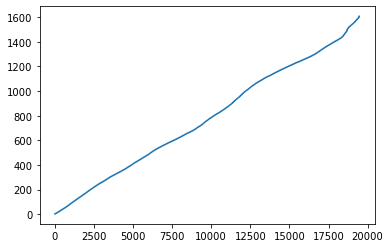

In [21]:
ax = df['frame'].plot()

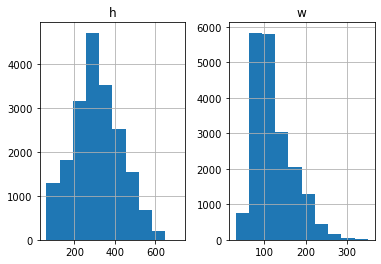

In [22]:
ax = df[['w', 'h']].hist()

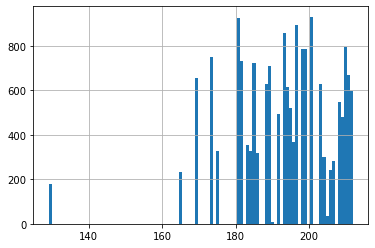

In [23]:
ax = df['ID'][df['ID']>0].hist(bins=100)

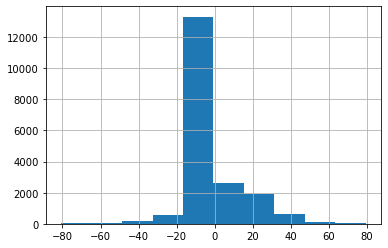

In [24]:
ax = df['yaw'].hist()

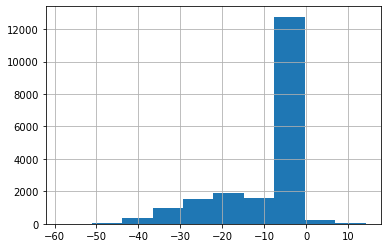

In [25]:
ax = df['pitch'].hist()

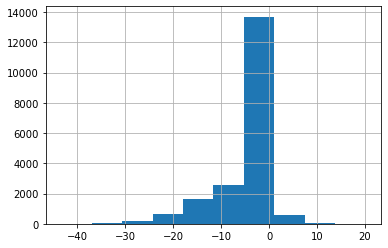

In [26]:
ax = df['roll'].hist()

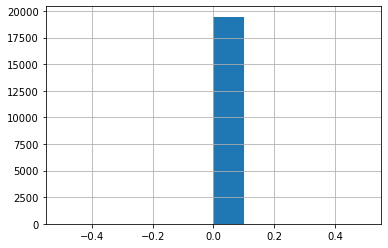

In [27]:
ax = df['action'].hist()

In [28]:
df['frame'].value_counts()

1268    20
1234    20
1236    20
1238    20
1240    20
        ..
1604     3
1492     3
1602     3
1603     3
1496     3
Name: frame, Length: 1606, dtype: int64

In [29]:
def video_to_frames(input_loc, output_loc):
    """Function to extract frames from input video file
    and save them as separate frames in an output directory.
    Args:
        input_loc: Input video file.
        output_loc: Output directory to save the frames.
    Returns:
        None
    """
    try:
        os.mkdir(output_loc)
    except OSError:
        pass
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(input_loc)
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    print ("Number of frames: ", video_length)
    count = 0
    print ("Converting video..\n")
    # Start converting the video
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        # Write the results back to output location.
        cv2.imwrite(output_loc + "/%#05d.jpg" % (count+1), frame)
        count = count + 1
        # If there are no more frames left
        if count % 100==0:
            print('count', video_length, count)
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break


In [30]:
input_loc = video_path
file_name = input_loc.split(os.sep)[-1]

file_name

'08-11-2019-1-2.MP4'

In [31]:
input_loc = video_path
output_loc = forder_pedestrian_images + file_name

video_to_frames(input_loc, output_loc)

In [32]:
def visualize_detections(image_path, annotation, is_save, figsize=(18, 18), linewidth=1, color=[0, 0, 1]):
    """Visualize Detections"""
    image = Image.open(image_path)
    image = np.array(image, dtype=np.uint8)
    img_h, img_w, img_c = image.shape
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(image)
    ax = plt.gca()
    x = annotation[:, 2]
    y = annotation[:, 3]
    w = annotation[:, 4]
    h = annotation[:, 5]
    boxes = np.stack((x, y, x+w, y+h), -1)
    classes = annotation[:, 1]
    features = annotation[:, 7:].astype(np.int)
    title = str.format('(%dx%d) %d box' %(img_h, img_w, len(boxes)))
    if len(boxes)>0:
        boxes_width = boxes[:, 2] - boxes[:, 0]
        boxes_height = boxes[:, 3] - boxes[:, 1]
        box_min_width = np.min(boxes_width)
        box_max_width = np.max(boxes_width)
        title = str.format('(%dx%d) %d box, width:%d ~ %d' 
                           %(img_h, img_w, len(boxes), box_min_width, box_max_width))

        for box, cls, feature in zip(boxes, classes, features):
            x1, y1, x2, y2 = box        
            w, h = x2 - x1, y2 - y1
            color = [0,1,0]
            patch = plt.Rectangle(
                [x1, y1], w, h, fill=False, edgecolor=color, linewidth=linewidth
            )
            ax.add_patch(patch)
            score_txt = int(cls) if cls > -1 else ''
            score_txt = str(score_txt)# + str(feature)
            ax.text(x1, y1, score_txt, bbox={"facecolor": [1,1,0], "alpha": 0.4}, clip_box=ax.clipbox, clip_on=True,)
    plt.title(title)
    if is_save:
        print('save', 'image_path', image_path)#save image_path 08-11-2019-1-1.MP4/00303.jpg
        path_subfolder = image_path.split(os.sep)[-2]
        path_filename = image_path.split(os.sep)[-1]
        path_save_folder = 'debug/'#+path_subfolder
        if not os.path.isdir(path_save_folder):
            os.mkdir(path_save_folder)
        
        plt.savefig(path_save_folder+ os.sep +path_subfolder +'_'+ path_filename, bbox_inches='tight')    
    #else: plt.show()
    return ax

for i in range(10000):
    ax = visualize_frame(i, is_save=True)

In [33]:
def crop_object(image_path, annotation):
    """Visualize Detections"""
    image = Image.open(image_path)
    arr = np.array(image, dtype=np.uint8)
    img_h, img_w, img_c = arr.shape
    
    list_x = []
    list_y = []
        
    for i in range(len(annotation)):
        annot = annotation[i]                
        x = int(annot[2])
        y = int(annot[3])
        w = int(annot[4])
        h = int(annot[5])
        
        arr_obj = arr[y:y+h, x:x+w]
        list_x.append(arr_obj)
        list_y.append(annot)
        
    return list_x, list_y

In [34]:
def crop_person_by_id_from_image(path_img, max_m=1e+10, cut_h=256, cut_w=128):
    
    person_arrs = []
    person_labels = []
    
    video_file_name = path_img.split('/')[-1]
    video_file_name_pre = video_file_name.split('.')[0]
    path_label = forder_pedestrian_annotation + video_file_name_pre + '.txt'
    #print('video_file_name', video_file_name)
    #print('label exist', os.path.isfile(path_label), path_label)
    df_video = pd.read_csv(path_label, header=None, names=columns)
    cond = df_video['ID'] > -1    
    df_video_valid = df_video[cond]
    print('df_video_valid', len(df_video), len(df_video_valid), video_file_name_pre) 
    path_images = forder_pedestrian_images + video_file_name + os.sep  
    list_imgs = glob(path_images + '*')
    list_imgs.sort()
    
    frame_min = df_video_valid['frame'].min()
    frame_max = df_video_valid['frame'].max()    
    print('frame_min', frame_min, 'frame_max', frame_max, 'nuniqe ID', df_video_valid['ID'].nunique())
    if frame_max > len(list_imgs):
        print('frame_max out of bound', frame_max, len(list_imgs))
                
    for frame in df_video_valid['frame'].unique():
        #df_row = list_imgs.iloc[i]
        df_frame = df_video_valid[df_video_valid['frame']==frame]
        if len(list_imgs) < frame:
            break
        path_img = list_imgs[frame-1]#new
        #print('path_img', frame, len(df_frame))
        img = Image.open(path_img)
        img_arr = np.array(img)
        for j in range(len(df_frame)):
            df_row = df_frame.iloc[j]
            person_id, x0, y0, w, h = df_row[['ID', 'x', 'y', 'w', 'h']]
            x1 = x0 + w
            y1 = y0 + h            
            img_person_crop = img.crop((x0, y0, x1, y1))
            img_person_crop = img_person_crop.resize((cut_w, cut_h))
            features = df_row.values[column_feature_index:].astype(np.int)
            
            person_arrs.append(np.array(img_person_crop))
            person_label = np.concatenate((np.reshape(person_id, [1]), features), 0)
            person_labels.append(person_label)
            #print(features)
            #print('df_frame', frame, len(df_frame), person_id)        
            if len(person_arrs) % 500==0: 
                print('len(person_arrs)', len(person_arrs))
        if len(person_arrs) >= max_m:
            break       
    
    person_arrs = np.stack(person_arrs)
    person_labels = np.stack(person_labels)
    print('len', len(person_arrs), len(person_labels), person_arrs.shape, person_labels.shape)
    print('nunique ID', len(np.unique(person_labels[:, 0])), np.unique(person_labels[:, 0]))
    return df_video, person_arrs, person_labels

def crop_person_by_id(video_m, max_m=1e+10, cut_h=256, cut_w=128):
    list_img_folder = glob(forder_pedestrian_images+'*')
    list_x = []
    list_y = []
    for i in range(video_m):
        path_img = list_img_folder[i]
        df_video, person_arrs, person_labels = crop_person_by_id_from_image(path_img, max_m, cut_h, cut_w)
        list_x.append(person_arrs)
        list_y.append(person_labels)
    
    x = np.concatenate(list_x, 0)
    y = np.concatenate(list_y, 0)
    print('x y shape', x.shape, y.shape, len(np.unique(y[:, 0])))
    return df_video, x, y

In [35]:
forder_pedestrian_images

'/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/'

In [36]:
glob(forder_pedestrian_images+'*')

['/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/08-11-2019-1-1.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/08-11-2019-1-2.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/08-11-2019-2-1.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/08-11-2019-2-2.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/10-07-2019-1-1.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/10-07-2019-1-2.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/10-07-2019-1-3.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/10-07-2019-1-4.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/10-07-2019-1-5.MP4',
 '/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/11-11-2019-1-2.MP4']

In [37]:
output_loc

'/media/mvlab/46FA9CA2FA9C8FB3/dataset/tracking/P-DESTRE/images/08-11-2019-1-2.MP4'

In [38]:
df_video, person_arrs, person_labels = crop_person_by_id(9, max_m=20000)

df_video_valid 12564 10555 08-11-2019-1-1
frame_min 3 frame_max 1327 nuniqe ID 34
len(person_arrs) 500
len(person_arrs) 1000
len(person_arrs) 1500
len(person_arrs) 2000
len(person_arrs) 2500
len(person_arrs) 3000
len(person_arrs) 3500
len(person_arrs) 4000
len(person_arrs) 4500
len(person_arrs) 5000
len(person_arrs) 5500
len(person_arrs) 6000
len(person_arrs) 6500
len(person_arrs) 7000
len(person_arrs) 7500
len(person_arrs) 8000
len(person_arrs) 8500
len(person_arrs) 9000
len(person_arrs) 9500
len(person_arrs) 10000
len(person_arrs) 10500
len 10555 10555 (10555, 256, 128, 3) (10555, 21)
nunique ID 34 [151. 165. 169. 173. 175. 180. 181. 182. 183. 184. 185. 186. 188. 189.
 190. 192. 193. 194. 195. 196. 197. 198. 199. 201. 203. 204. 205. 206.
 207. 208. 209. 210. 211. 212.]
df_video_valid 19465 17688 08-11-2019-1-2
frame_min 3 frame_max 1608 nuniqe ID 33
frame_max out of bound 1608 1607
len(person_arrs) 500
len(person_arrs) 1000
len(person_arrs) 1500
len(person_arrs) 2000
len(person_arrs)

In [92]:
person_arrs.shape, person_labels.shape

((118911, 256, 128, 3), (118911, 21))

In [ ]:
INDEX_ID = 0
INDEX_GENDER = 5
INDEX_AGE = 6
INDEX_HEIGHT = 7
INDEX_BODY_VOLUME = 8
INDEX_ETHNICITY = 9
INDEX_HAIR_COLOR = 10
INDEX_HAIRSTYLE = 11
INDEX_BEARD = 12
INDEX_MUSTACHE = 13
INDEX_GLASSES = 14
INDEX_HEAD_ACCESSORIES = 15
INDEX_UPPER_CLOTH = 16
INDEX_LOWER_CLOTH = 17
INDEX_FEET = 18
INDEX_ACCESSORIES = 19
INDEX_ACTION = 20

In [118]:
Unknown_AGE = 8
Unknown_HEIGHT = 4
Unknown_ETHNICITY = 4
Unknown_HAIR_COLOR = 6
Unknown_HAIRSTYLE = 5
Unknown_BERD = 2
Unknown_MUSTACHE = 2
Unknown_GLASSES = 3
Unknown_HEAD_ACCESSORIES = 4
Unknown_LOWER_CLOTH = 9
Unknown_FEET = 6
Unknown_ACCESSORIES = 7

In [97]:
for i in range(INDEX_AGE, INDEX_ACCESSORIES):
    print(i, np.unique(person_labels[:, i]))

6 [2. 3. 4.]
7 [1. 2. 3.]
8 [0. 1.]
9 [0. 1. 3.]
10 [0. 1. 5.]
11 [1. 2. 3. 4. 5.]
12 [0. 1. 2.]
13 [0. 1. 2.]
14 [0. 1. 2. 3.]
15 [3.]
16 [ 0.  1.  6.  8.  9. 10.]
17 [0. 1. 2. 6.]
18 [0. 1. 4.]


In [128]:
print(sum(person_labels[:, INDEX_AGE]==Unknown_AGE), 
      sum(person_labels[:, INDEX_HEIGHT]==Unknown_HEIGHT),
      sum(person_labels[:, INDEX_ETHNICITY]==Unknown_ETHNICITY),
      sum(person_labels[:, INDEX_HAIR_COLOR]==Unknown_HAIR_COLOR),
      sum(person_labels[:, INDEX_HAIRSTYLE]==Unknown_HAIRSTYLE),#
      sum(person_labels[:, INDEX_BEARD]==Unknown_BERD),#
      sum(person_labels[:, INDEX_MUSTACHE]==Unknown_MUSTACHE),#
      sum(person_labels[:, INDEX_GLASSES]==Unknown_GLASSES),#
      sum(person_labels[:, INDEX_HEAD_ACCESSORIES]==Unknown_HEAD_ACCESSORIES),
      sum(person_labels[:, INDEX_LOWER_CLOTH]==Unknown_LOWER_CLOTH),
      sum(person_labels[:, INDEX_FEET]==Unknown_FEET),
      sum(person_labels[:, INDEX_ACCESSORIES]==Unknown_ACCESSORIES),
     )


0 0 0 0 0 0 0 0 0 0 0 0


In [129]:
person_labels[:, INDEX_HAIRSTYLE][person_labels[:, INDEX_HAIRSTYLE]==Unknown_HAIRSTYLE] = -1
person_labels[:, INDEX_BEARD][person_labels[:, INDEX_BEARD]==Unknown_BERD] = -1
person_labels[:, INDEX_MUSTACHE][person_labels[:, INDEX_MUSTACHE]==Unknown_MUSTACHE] = -1
person_labels[:, INDEX_GLASSES][person_labels[:, INDEX_GLASSES]==Unknown_GLASSES] = -1

In [39]:
df_video

,frame,ID,x,y,w,h,head,yaw,pitch,roll,...,hairstyle,beard,mustache,glasses,head accessories,upper cloth,lower cloth,feet,accessories,action
0,1,6,2387.2,1498.7,164.23,392.41,1,7.7715,-21.027,-5.0041,...,5,0,0,0,3,10,0,0,1,0
1,1,14,2115.0,1529.7,141.90,390.80,1,7.7715,-21.027,-5.0041,...,5,1,1,2,3,10,0,0,1,0
2,1,3,1938.4,1639.8,158.62,252.30,1,7.7715,-21.027,-5.0041,...,5,0,0,2,3,10,0,0,1,0
3,1,19,2251.6,1596.3,143.53,409.91,1,7.7715,-21.027,-5.0041,...,5,0,0,1,3,10,0,0,1,0
4,1,4,2892.7,1671.4,188.89,435.61,1,7.7715,-21.027,-5.0041,...,5,0,0,2,3,10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33414,2478,33,2032.6,2019.7,139.12,141.53,1,7.7715,-21.027,-5.0041,...,5,0,0,1,3,0,0,0,1,0
33415,2479,33,2041.0,2032.9,130.52,128.32,1,7.7715,-21.027,-5.0041,...,5,0,0,1,3,0,0,0,1,0
33416,2480,33,2049.9,2044.6,122.64,116.56,1,7.7715,-21.027,-5.0041,...,5,0,0,1,3,0,0,0,1,0
33417,2481,33,2061.2,2060.7,108.12,100.44,1,7.7715,-21.027,-5.0041,...,5,0,0,1,3,0,0,0,1,0


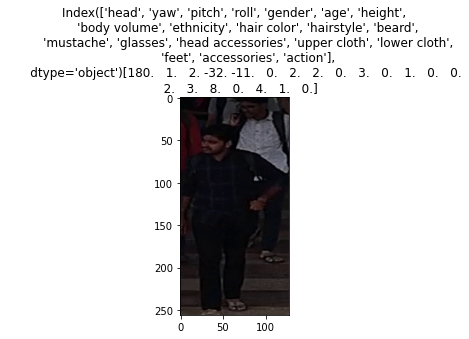

In [40]:
i = 100
plt.title(str(df.columns[column_feature_index:]) + str(person_labels[i]))
plt.imshow(person_arrs[i])

/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


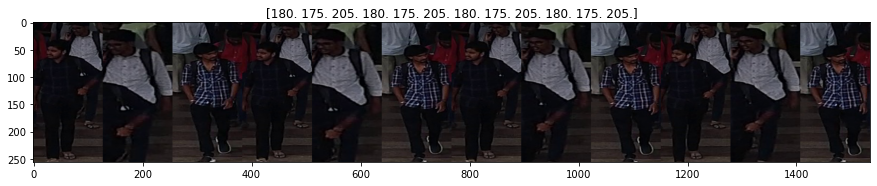

In [41]:
plt.figure(figsize=(15,10))
plt.title(person_labels[100:112, INDEX_ID])
plt.imshow(np.concatenate(person_arrs[100:112], axis=1))

In [3]:
x_train = person_arrs[::10]
y_train = person_labels[::10]
x_test = person_arrs[1::2]
y_test = person_labels[1::2]

NameError: name 'person_arrs' is not defined

In [2]:
len(x_train), len(x_test), x_train.shape, y_train.shape

NameError: name 'x_train' is not defined

In [44]:
len(np.unique(y_train)), len(np.unique(y_test)), np.unique(y_train) == np.unique(y_test)

<ipython-input-44-829f04f44788>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  len(np.unique(y_train)), len(np.unique(y_test)), np.unique(y_train) == np.unique(y_test)


(183, 208, False)

In [45]:
model = models.Sequential()
model.add(layers.Input((img_h, img_w, 3)))
model.add(layers.Conv2D(32, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1000))

model.summary()

In [46]:
len(columns[column_feature_index:]), columns[column_feature_index:], feature_column_k

(20,
 ['head',
  'yaw',
  'pitch',
  'roll',
  'gender',
  'age',
  'height',
  'body volume',
  'ethnicity',
  'hair color',
  'hairstyle',
  'beard',
  'mustache',
  'glasses',
  'head accessories',
  'upper cloth',
  'lower cloth',
  'feet',
  'accessories',
  'action'],
 [261, 2, 1, 1, 1, 2, 9, 5, 4, 5, 7, 6, 3, 3, 4, 5, 12, 10, 7, 8, 14])

In [47]:
feature_column_k_cumsum = np.cumsum(feature_column_k)
feature_column_k, feature_column_k_cumsum

([261, 2, 1, 1, 1, 2, 9, 5, 4, 5, 7, 6, 3, 3, 4, 5, 12, 10, 7, 8, 14],
 array([261, 263, 264, 265, 266, 268, 277, 282, 286, 291, 298, 304, 307,
        310, 314, 319, 331, 341, 348, 356, 370]))

In [48]:
feature_column_k[4], feature_column_k[5]

(1, 2)

In [49]:
feature_column_k_cumsum[INDEX_HAIRSTYLE-1], feature_column_k_cumsum[INDEX_HAIRSTYLE]

(298, 304)

In [164]:
def sparse_categorical_crossentropy(y, h, from_logits):
    k = tf.shape(h)[-1]
    y_hot = tf.one_hot(y, k)
    prob = tf.nn.softmax(h)
    prob = tf.clip_by_value(prob, 1e-7, 1-1e-7)
    loss = - y_hot * tf.math.log(prob) - (1 - y_hot) * tf.math.log(1 - prob)
    loss = tf.reduce_sum(loss, -1) * tf.cast(y > -1, tf.float32)
    return loss

In [165]:
class NetLoss(tf.losses.Loss):
    
    def __init__(self):
        super(NetLoss, self).__init__(reduction="auto", name="NetLoss")        

    def call(self, y, h):
        y_cls = tf.cast(y[:, 0], tf.int64)
        y_gender = tf.cast(y[:, INDEX_GENDER], tf.int64)
        y_age = tf.cast(y[:, INDEX_AGE], tf.int64)
        y_height = tf.cast(y[:, INDEX_HEIGHT], tf.int64)
        y_body = tf.cast(y[:, INDEX_BODY_VOLUME], tf.int64)
        y_hairstyle = tf.cast(y[:, INDEX_HAIRSTYLE], tf.int64)
        y_upper = tf.cast(y[:, INDEX_UPPER_CLOTH], tf.int64)
        y_lower = tf.cast(y[:, INDEX_LOWER_CLOTH], tf.int64)
        y_feet = tf.cast(y[:, INDEX_FEET], tf.int64)
        y_accessories = tf.cast(y[:, INDEX_ACCESSORIES], tf.int64)
        y_action = tf.cast(y[:, INDEX_ACTION], tf.int64)
        
        h_cls = h[:, :feature_column_k_cumsum[0]]
        h_gender = h[:, feature_column_k_cumsum[INDEX_GENDER-1]:feature_column_k_cumsum[INDEX_GENDER]]
        h_age = h[:, feature_column_k_cumsum[INDEX_AGE-1]:feature_column_k_cumsum[INDEX_AGE]]
        h_height = h[:, feature_column_k_cumsum[INDEX_HEIGHT-1]:feature_column_k_cumsum[INDEX_HEIGHT]]
        h_body = h[:, feature_column_k_cumsum[INDEX_BODY_VOLUME-1]:feature_column_k_cumsum[INDEX_BODY_VOLUME]]
        h_hairstyle = h[:, feature_column_k_cumsum[INDEX_HAIRSTYLE-1]:feature_column_k_cumsum[INDEX_HAIRSTYLE]]
        h_upper = h[:, feature_column_k_cumsum[INDEX_UPPER_CLOTH-1]:feature_column_k_cumsum[INDEX_UPPER_CLOTH]]
        h_lower = h[:, feature_column_k_cumsum[INDEX_LOWER_CLOTH-1]:feature_column_k_cumsum[INDEX_LOWER_CLOTH]]
        h_feet = h[:, feature_column_k_cumsum[INDEX_FEET-1]:feature_column_k_cumsum[INDEX_FEET]]
        h_accessories = h[:, feature_column_k_cumsum[INDEX_ACCESSORIES-1]:feature_column_k_cumsum[INDEX_ACCESSORIES]]
        h_action = h[:, feature_column_k_cumsum[INDEX_ACTION-1]:feature_column_k_cumsum[INDEX_ACTION]]
        
        y_hot = tf.one_hot(y_cls, class_k)        
        pt = tf.nn.softmax(h_cls)
        pt = tf.clip_by_value(pt, 1e-7, 1.0 - 1e-7)                
        loss_p = - y_hot * tf.math.log(pt)        
        loss_f = - (1 - y_hot) * tf.math.log(1 - pt)
        loss = loss_p + loss_f
        
        loss_cls = sparse_categorical_crossentropy(y_cls, h_cls, from_logits=True)        
        loss_gender = sparse_categorical_crossentropy(y_gender, h_gender, from_logits=True)
        loss_age = sparse_categorical_crossentropy(y_age, h_age, from_logits=True)
        loss_height = sparse_categorical_crossentropy(y_height, h_height, from_logits=True)
        loss_body = sparse_categorical_crossentropy(y_body, h_body, from_logits=True)
        loss_hairstyle = sparse_categorical_crossentropy(y_hairstyle, h_hairstyle, from_logits=True)
        loss_upper = sparse_categorical_crossentropy(y_upper, h_upper, from_logits=True)
        loss_lower = sparse_categorical_crossentropy(y_lower, h_lower, from_logits=True)
        loss_feet = sparse_categorical_crossentropy(y_feet, h_feet, from_logits=True)
        loss_accessories = sparse_categorical_crossentropy(y_accessories, h_accessories, from_logits=True)
        loss_action = sparse_categorical_crossentropy(y_action, h_action, from_logits=True)
        
        loss = loss_cls + loss_gender + loss_age
        loss += loss_height + loss_body + loss_hairstyle + loss_upper + loss_lower+loss_feet+loss_accessories+loss_action
                
        return loss

In [166]:
def acc_cls(y, h):    
    y_cls = tf.cast(y[:, 0], tf.int64)
    h_score = h[:, :feature_column_k[0]]
    h_cls = tf.argmax(h_score, -1)    
    
    acc = tf.equal(y_cls, h_cls)
    return acc

def acc_gender(y, h):    
    y_cls = tf.cast(y[:, INDEX_GENDER], tf.int64)
    h_score = h[:, feature_column_k_cumsum[INDEX_GENDER-1]:feature_column_k_cumsum[INDEX_GENDER]]
    h_cls = tf.argmax(h_score, -1)
    acc = tf.equal(y_cls, h_cls)
    return acc

def acc_age(y, h):    
    y_cls = tf.cast(y[:, INDEX_AGE], tf.int64)
    h_score = h[:, feature_column_k_cumsum[INDEX_AGE-1]:feature_column_k_cumsum[INDEX_AGE]]
    h_cls = tf.argmax(h_score, -1)
    acc = tf.equal(y_cls, h_cls)
    return acc

def acc_hair(y, h):    
    y_cls = tf.cast(y[:, INDEX_HAIRSTYLE], tf.int64)
    h_score = h[:, feature_column_k_cumsum[INDEX_HAIRSTYLE-1]:feature_column_k_cumsum[INDEX_HAIRSTYLE]]
    h_cls = tf.argmax(h_score, -1)
    acc = tf.equal(y_cls, h_cls)
    return acc

In [167]:
loss_fn = NetLoss()
model.compile(optimizer='adam', loss=loss_fn, metrics=[acc_cls, acc_gender, acc_age, acc_hair])

In [168]:
model.load_weights(path_weight)

In [175]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
372/372 [==============================] - 198s 532ms/step - loss: 0.7788 - acc_cls: 0.9987 - acc_gender: 0.9934 - acc_age: 0.9985 - acc_hair: 0.5214
Epoch 2/10
372/372 [==============================] - 197s 530ms/step - loss: 0.7327 - acc_cls: 0.9985 - acc_gender: 0.9944 - acc_age: 0.9982 - acc_hair: 0.5236
Epoch 3/10
372/372 [==============================] - 199s 535ms/step - loss: 0.7492 - acc_cls: 0.9983 - acc_gender: 0.9955 - acc_age: 0.9986 - acc_hair: 0.5229
Epoch 4/10
372/372 [==============================] - 201s 541ms/step - loss: 0.6723 - acc_cls: 0.9991 - acc_gender: 0.9956 - acc_age: 0.9989 - acc_hair: 0.5234
Epoch 5/10
372/372 [==============================] - 200s 539ms/step - loss: 0.7696 - acc_cls: 0.9987 - acc_gender: 0.9954 - acc_age: 0.9987 - acc_hair: 0.5229
Epoch 6/10
372/372 [==============================] - 199s 534ms/step - loss: 0.6555 - acc_cls: 0.9993 - acc_gender: 0.9952 - acc_age: 0.9985 - acc_hair: 0.5235
Epoch 7/10
372/372 [==============

In [176]:
model.save_weights(path_weight)

In [177]:
model.evaluate(x_test, y_test)
'''
cls          : 75%
cls + gender : 70~78%
'''

1858/1858 [==============================] - 138s 74ms/step - loss: 7.2015 - acc_cls: 0.9048 - acc_gender: 0.9626 - acc_age: 0.9765 - acc_hair: 0.4884


'\ncls          : 75%\ncls + gender : 70~78%\n'